# RhythmPerceptionQuestionsGenerator  
Author: AHuiXiQue

In [33]:
import music21 as mus
from random import randint
import os
from PIL import Image, ImageDraw, ImageFont
from moviepy.editor import ImageClip, AudioFileClip, concatenate_videoclips
import numpy as np
from tqdm import tqdm

In [4]:
mus.environment.set("musescoreDirectPNGPath","D:/MyFiles/Softwares/MuseScore/bin/MuseScore4.exe")
mus.environment.set("musicxmlPath","D:/MyFiles/Softwares/MuseScore/bin/MuseScore4.exe")
MusescorePath="D:/MyFiles/Softwares/MuseScore/bin/MuseScore4.exe"

In [5]:
# rhythm modes in 4/4:
# 0-4: onebeat, the first note can be rest or tied to before
# 5-7: onebeat, can not
# 8-9: twobeat, can
# 10-15: twobeat can not
Mode44=["a8 a8","a16 a16 a16 a16","a16 a16 a8","a8 a16 a16","a8. a16","a16 a8.","a16 a8 a16","trip{a8 a a}","a8 a4 a8","a8 a4 a16 a16","a16 a16 a4 a8","a16 a16 a4 a16 a16","a4. a8","a4. a16 a16","a8 a4.","a16 a16 a4."]

# rhythm modes in 6/8
# 0-8 can not, the others can
Mode86=["a4 a16 a16","a4 a8","a16 a8 a8 a16","a16 a8 a16 a8","a8 a16 a8 a16","a16 a8. a8","a16 a8. a16 a16","a8 a16 a8.","a16 a16 a16 a8.","a8 a8 a8","a16 a16 a4","a8 a4","a16 a16 a16 a16 a16 a16","a16 a16 a8 a8","a8 a16 a16 a8","a8 a8 a16 a16","a16 a16 a16 a16 a8","a16 a16 a8 a16 a16","a8 a16 a16 a16 a16","a8. a16 a8","a8. a16 a16 a16","a8 a8. a16","a16 a16 a8. a16"]

In [23]:
len(Mode86)

23

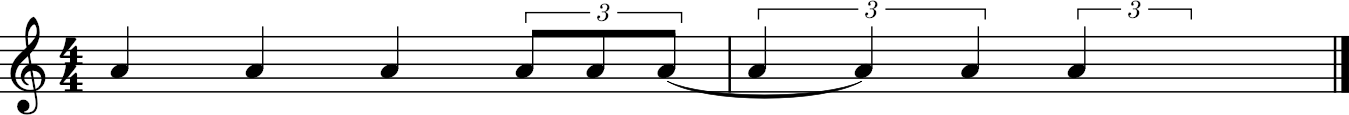

In [22]:
def f0():
    s=mus.converter.parse("tinynotation: 4/4 "+"a4 a4 a4 trip{a8 a8 a8}~ a4 a4 a4 a4")
    s.show()

f0()

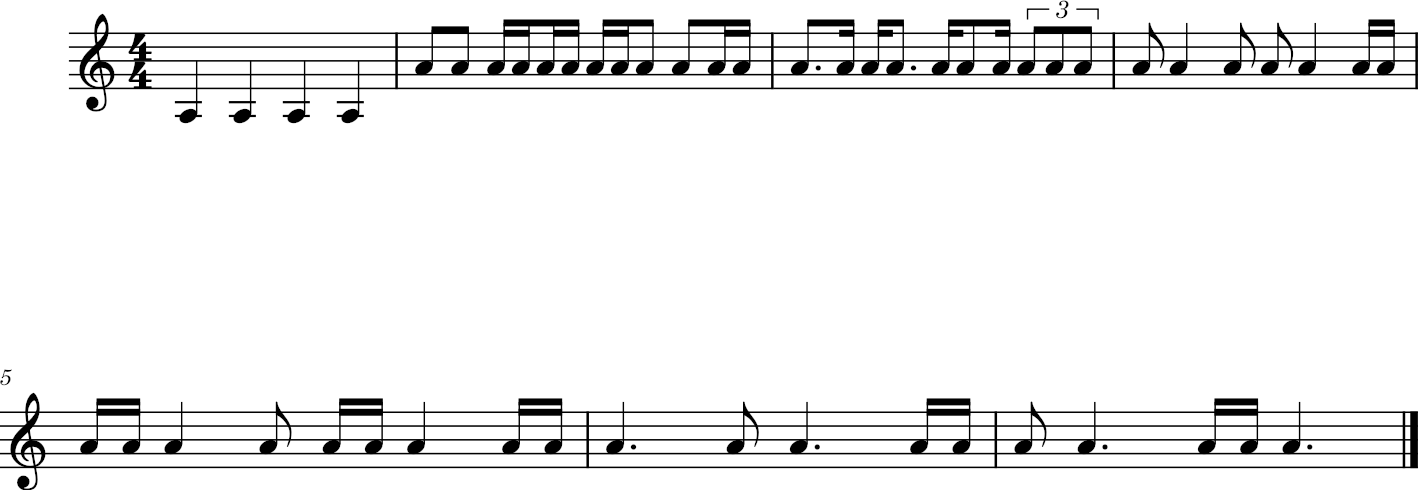

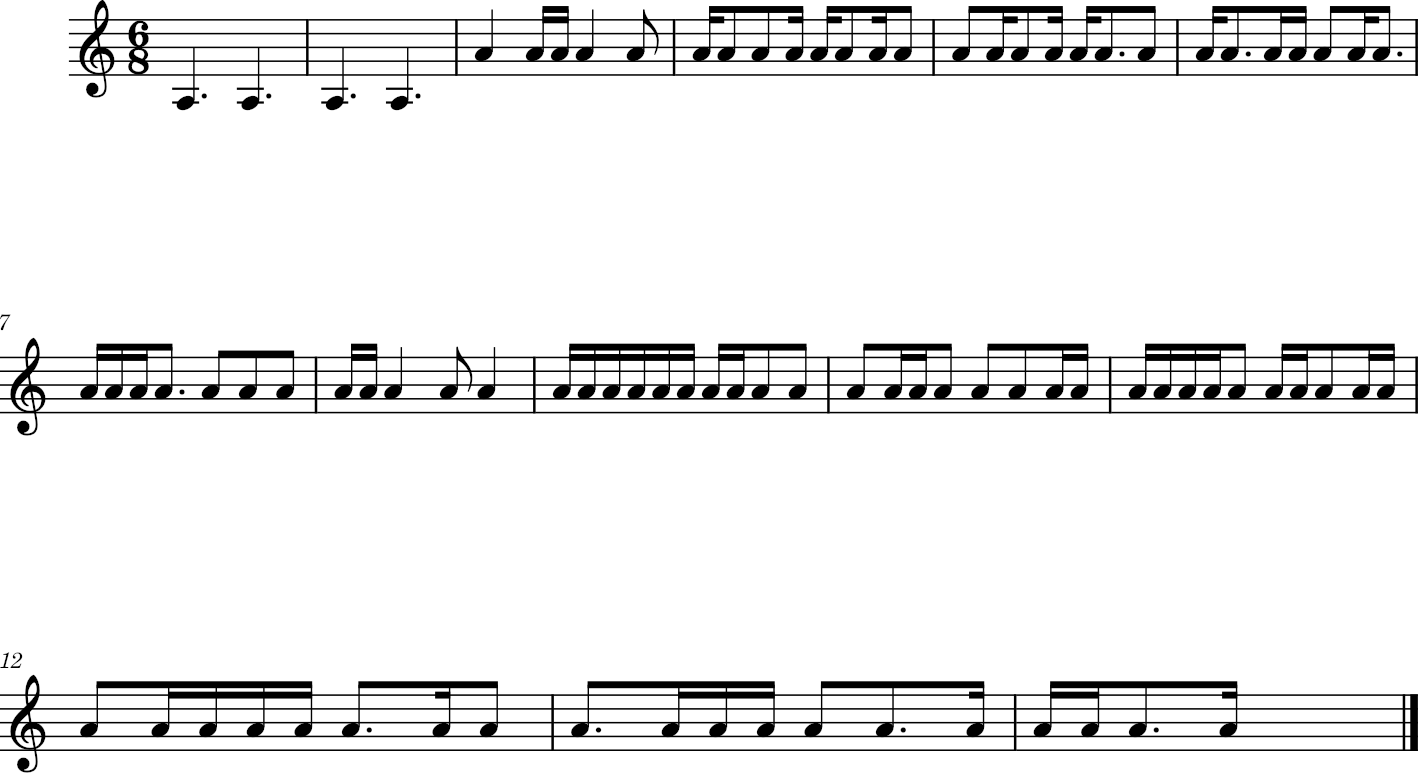

In [6]:
def f0():
    s1=mus.converter.parse("tinynotation: 4/4 "+"A4 A4 A4 A4 "+" ".join(Mode44))
    s1.show()
    s2=mus.converter.parse("tinynotation: 6/8 "+"A4. A4. A4. A4. "+" ".join(Mode86))
    s2.show()

f0()

In [24]:
def ARandomMeasureInIndex44():
    r=[randint(0,15) for i in range(2)]
    if r[0]>=8 and r[1]>=8:
        return r
    if r[0]>=8 and r[1]<=7:
        return r+[randint(0,7)]
    if r[0]<=7 and r[1]>=8:
        return r+[randint(0,7)]
    if r[0]<=7 and r[1]<=7:
        r2=randint(0,15)
        if r2<=7: return r+[r2,randint(0,7)]
        else: return r+[r2]

def Random4MeasureInIndex44():
    return ARandomMeasureInIndex44()+ARandomMeasureInIndex44()+ARandomMeasureInIndex44()+ARandomMeasureInIndex44()

def Random4MeasureWithout44():
    return " ".join([Mode44[i] for i in Random4MeasureInIndex44()])

def Random4MeasureWith44():
    rd4mInIndex=Random4MeasureInIndex44()
    ties=[]
    rests=[]
    for i in range(1,len(rd4mInIndex)):
        if (rd4mInIndex[i]>=0 and rd4mInIndex[i]<=4) or (rd4mInIndex[i]>=8 and rd4mInIndex[i] <=9):
            r=randint(0,3)
            if r==2 and rd4mInIndex[i-1]!=7: ties.append(i)
            if r==3: rests.append(i)

    out=[Mode44[i] for i in rd4mInIndex]
    for i in ties: out[i-1]=out[i-1]+"~"
    for i in rests: out[i]="r"+out[i][1:]

    return " ".join(out)

def Random4MeasureInIndex86():
    return [randint(0,22) for i in range(8)]

def Random4MeasureWithout86():
    return " ".join([Mode86[i] for i in Random4MeasureInIndex86()])

def Random4MeasureWith86():
    rd4mInIndex=Random4MeasureInIndex86()
    ties=[]
    rests=[]
    for i in range(1,len(rd4mInIndex)):
        if rd4mInIndex[i]>=9 and rd4mInIndex[i]<=22:
            r=randint(0,3)
            if r==2: ties.append(i)
            if r==3: rests.append(i)

    out=[Mode86[i] for i in rd4mInIndex]
    for i in ties: out[i-1]=out[i-1]+"~"
    for i in rests: out[i]="r"+out[i][1:]

    return " ".join(out)

In [61]:
def MakeAQuestionXMLMP3PNG(question,qi,fpath,TimeSignatureType,tempoNum): # TimeSignatureType 0: 4/4 1: 6/8
    ref=[mus.note.Note(quarterLength=1),mus.note.Note(quarterLength=1.5)]
    TimeSignature=["4/4","6/8"]
    Prebeat=["A4 A4 A4 A4","D8 A8 A8 D8 A8 A8"]
    SIncludePrebeat=mus.converter.parse("tinynotation: "+TimeSignature[TimeSignatureType]+" "+Prebeat[TimeSignatureType]+" "+question)
    SNotIncludePrebeat=mus.converter.parse("tinynotation: "+TimeSignature[TimeSignatureType]+" "+question)
    for s in [SIncludePrebeat,SNotIncludePrebeat]:
        s[0].insert(0,mus.tempo.MetronomeMark(number=tempoNum,referent=ref[TimeSignatureType]))
        s.insert(0,mus.instrument.Piano())
        s.metadata=mus.metadata.Metadata(title=str(qi),composer="")

    SIncludePrebeat.write("musicxml",fp=fpath+"/MP3XML/"+"{}.xml".format(qi))
    SNotIncludePrebeat.write("musicxml",fp=fpath+"/PNGXML/"+"{}.xml".format(qi))
    os.system(MusescorePath+" -o "+fpath+"/MP3/{}.mp3 ".format(qi)+fpath+"/MP3XML/{}.xml".format(qi))
    os.system(MusescorePath+" -o "+fpath+"/PNG/{}.png ".format(qi)+fpath+"/PNGXML/{}.xml".format(qi))

In [62]:
def MakeAQuestionMP4(fp,FirstFigPath,qi):
    AnswerFig=np.array(Image.open(fp+"/PNG/{}-1.png".format(qi)).crop((0,0,2975,1673)))
    FirstFig=np.array(Image.open(FirstFigPath).crop((0,0,2975,1673)))
    audio=AudioFileClip(fp+"/MP3/{}.mp3".format(qi))
    clips=[]
    for img in [FirstFig,AnswerFig]:
        clips.append(ImageClip(img,duration=audio.duration).set_audio(audio))

    FinalClip=concatenate_videoclips(clips)
    FinalClip.write_videofile(fp+"/MP4/{}.mp4".format(qi),codec="libx264",audio_codec="aac",fps=2)
    for c in clips: c.close()
    FinalClip.close()

## 1

In [67]:
for qi in tqdm(range(100)):
    MakeAQuestionXMLMP3PNG(Random4MeasureWithout44(),qi+1,"44WithoutTR",0,60+qi//10*2)

for qi in range(100):
    MakeAQuestionMP4("44WithoutTR","../OtherAsset/Cover1/44First.png",qi+1)

100%|██████████| 100/100 [07:31<00:00,  4.51s/it]


Moviepy - Building video 44WithoutTR/MP4/1.mp4.
MoviePy - Writing audio in 1TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/1.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/1.mp4
Moviepy - Building video 44WithoutTR/MP4/2.mp4.
MoviePy - Writing audio in 2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/2.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/2.mp4
Moviepy - Building video 44WithoutTR/MP4/3.mp4.
MoviePy - Writing audio in 3TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/3.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/3.mp4
Moviepy - Building video 44WithoutTR/MP4/4.mp4.
MoviePy - Writing audio in 4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/4.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/4.mp4
Moviepy - Building video 44WithoutTR/MP4/5.mp4.
MoviePy - Writing audio in 5TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/5.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/5.mp4
Moviepy - Building video 44WithoutTR/MP4/6.mp4.
MoviePy - Writing audio in 6TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/6.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/6.mp4
Moviepy - Building video 44WithoutTR/MP4/7.mp4.
MoviePy - Writing audio in 7TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/7.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/7.mp4
Moviepy - Building video 44WithoutTR/MP4/8.mp4.
MoviePy - Writing audio in 8TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/8.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/8.mp4
Moviepy - Building video 44WithoutTR/MP4/9.mp4.
MoviePy - Writing audio in 9TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/9.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/9.mp4
Moviepy - Building video 44WithoutTR/MP4/10.mp4.
MoviePy - Writing audio in 10TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/10.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/10.mp4
Moviepy - Building video 44WithoutTR/MP4/11.mp4.
MoviePy - Writing audio in 11TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/11.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/11.mp4
Moviepy - Building video 44WithoutTR/MP4/12.mp4.
MoviePy - Writing audio in 12TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/12.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/12.mp4
Moviepy - Building video 44WithoutTR/MP4/13.mp4.
MoviePy - Writing audio in 13TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/13.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/13.mp4
Moviepy - Building video 44WithoutTR/MP4/14.mp4.
MoviePy - Writing audio in 14TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/14.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/14.mp4
Moviepy - Building video 44WithoutTR/MP4/15.mp4.
MoviePy - Writing audio in 15TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/15.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/15.mp4
Moviepy - Building video 44WithoutTR/MP4/16.mp4.
MoviePy - Writing audio in 16TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/16.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/16.mp4
Moviepy - Building video 44WithoutTR/MP4/17.mp4.
MoviePy - Writing audio in 17TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/17.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/17.mp4
Moviepy - Building video 44WithoutTR/MP4/18.mp4.
MoviePy - Writing audio in 18TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/18.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/18.mp4
Moviepy - Building video 44WithoutTR/MP4/19.mp4.
MoviePy - Writing audio in 19TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/19.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/19.mp4
Moviepy - Building video 44WithoutTR/MP4/20.mp4.
MoviePy - Writing audio in 20TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/20.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/20.mp4
Moviepy - Building video 44WithoutTR/MP4/21.mp4.
MoviePy - Writing audio in 21TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/21.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/21.mp4
Moviepy - Building video 44WithoutTR/MP4/22.mp4.
MoviePy - Writing audio in 22TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/22.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/22.mp4
Moviepy - Building video 44WithoutTR/MP4/23.mp4.
MoviePy - Writing audio in 23TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/23.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/23.mp4
Moviepy - Building video 44WithoutTR/MP4/24.mp4.
MoviePy - Writing audio in 24TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/24.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/24.mp4
Moviepy - Building video 44WithoutTR/MP4/25.mp4.
MoviePy - Writing audio in 25TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/25.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/25.mp4
Moviepy - Building video 44WithoutTR/MP4/26.mp4.
MoviePy - Writing audio in 26TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/26.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/26.mp4
Moviepy - Building video 44WithoutTR/MP4/27.mp4.
MoviePy - Writing audio in 27TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/27.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/27.mp4
Moviepy - Building video 44WithoutTR/MP4/28.mp4.
MoviePy - Writing audio in 28TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/28.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/28.mp4
Moviepy - Building video 44WithoutTR/MP4/29.mp4.
MoviePy - Writing audio in 29TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/29.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/29.mp4
Moviepy - Building video 44WithoutTR/MP4/30.mp4.
MoviePy - Writing audio in 30TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/30.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/30.mp4
Moviepy - Building video 44WithoutTR/MP4/31.mp4.
MoviePy - Writing audio in 31TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/31.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/31.mp4
Moviepy - Building video 44WithoutTR/MP4/32.mp4.
MoviePy - Writing audio in 32TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/32.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/32.mp4
Moviepy - Building video 44WithoutTR/MP4/33.mp4.
MoviePy - Writing audio in 33TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/33.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/33.mp4
Moviepy - Building video 44WithoutTR/MP4/34.mp4.
MoviePy - Writing audio in 34TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/34.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/34.mp4
Moviepy - Building video 44WithoutTR/MP4/35.mp4.
MoviePy - Writing audio in 35TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/35.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/35.mp4
Moviepy - Building video 44WithoutTR/MP4/36.mp4.
MoviePy - Writing audio in 36TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/36.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/36.mp4
Moviepy - Building video 44WithoutTR/MP4/37.mp4.
MoviePy - Writing audio in 37TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/37.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/37.mp4
Moviepy - Building video 44WithoutTR/MP4/38.mp4.
MoviePy - Writing audio in 38TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/38.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/38.mp4
Moviepy - Building video 44WithoutTR/MP4/39.mp4.
MoviePy - Writing audio in 39TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/39.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/39.mp4
Moviepy - Building video 44WithoutTR/MP4/40.mp4.
MoviePy - Writing audio in 40TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/40.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/40.mp4
Moviepy - Building video 44WithoutTR/MP4/41.mp4.
MoviePy - Writing audio in 41TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/41.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/41.mp4
Moviepy - Building video 44WithoutTR/MP4/42.mp4.
MoviePy - Writing audio in 42TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/42.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/42.mp4
Moviepy - Building video 44WithoutTR/MP4/43.mp4.
MoviePy - Writing audio in 43TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/43.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/43.mp4
Moviepy - Building video 44WithoutTR/MP4/44.mp4.
MoviePy - Writing audio in 44TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/44.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/44.mp4
Moviepy - Building video 44WithoutTR/MP4/45.mp4.
MoviePy - Writing audio in 45TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/45.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/45.mp4
Moviepy - Building video 44WithoutTR/MP4/46.mp4.
MoviePy - Writing audio in 46TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/46.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/46.mp4
Moviepy - Building video 44WithoutTR/MP4/47.mp4.
MoviePy - Writing audio in 47TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/47.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/47.mp4
Moviepy - Building video 44WithoutTR/MP4/48.mp4.
MoviePy - Writing audio in 48TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/48.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/48.mp4
Moviepy - Building video 44WithoutTR/MP4/49.mp4.
MoviePy - Writing audio in 49TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/49.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/49.mp4
Moviepy - Building video 44WithoutTR/MP4/50.mp4.
MoviePy - Writing audio in 50TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/50.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/50.mp4
Moviepy - Building video 44WithoutTR/MP4/51.mp4.
MoviePy - Writing audio in 51TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/51.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/51.mp4
Moviepy - Building video 44WithoutTR/MP4/52.mp4.
MoviePy - Writing audio in 52TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/52.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/52.mp4
Moviepy - Building video 44WithoutTR/MP4/53.mp4.
MoviePy - Writing audio in 53TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/53.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/53.mp4
Moviepy - Building video 44WithoutTR/MP4/54.mp4.
MoviePy - Writing audio in 54TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/54.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/54.mp4
Moviepy - Building video 44WithoutTR/MP4/55.mp4.
MoviePy - Writing audio in 55TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/55.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/55.mp4
Moviepy - Building video 44WithoutTR/MP4/56.mp4.
MoviePy - Writing audio in 56TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/56.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/56.mp4
Moviepy - Building video 44WithoutTR/MP4/57.mp4.
MoviePy - Writing audio in 57TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/57.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/57.mp4
Moviepy - Building video 44WithoutTR/MP4/58.mp4.
MoviePy - Writing audio in 58TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/58.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/58.mp4
Moviepy - Building video 44WithoutTR/MP4/59.mp4.
MoviePy - Writing audio in 59TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/59.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/59.mp4
Moviepy - Building video 44WithoutTR/MP4/60.mp4.
MoviePy - Writing audio in 60TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/60.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/60.mp4
Moviepy - Building video 44WithoutTR/MP4/61.mp4.
MoviePy - Writing audio in 61TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/61.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/61.mp4
Moviepy - Building video 44WithoutTR/MP4/62.mp4.
MoviePy - Writing audio in 62TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/62.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/62.mp4
Moviepy - Building video 44WithoutTR/MP4/63.mp4.
MoviePy - Writing audio in 63TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/63.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/63.mp4
Moviepy - Building video 44WithoutTR/MP4/64.mp4.
MoviePy - Writing audio in 64TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/64.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/64.mp4
Moviepy - Building video 44WithoutTR/MP4/65.mp4.
MoviePy - Writing audio in 65TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/65.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/65.mp4
Moviepy - Building video 44WithoutTR/MP4/66.mp4.
MoviePy - Writing audio in 66TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/66.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/66.mp4
Moviepy - Building video 44WithoutTR/MP4/67.mp4.
MoviePy - Writing audio in 67TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/67.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/67.mp4
Moviepy - Building video 44WithoutTR/MP4/68.mp4.
MoviePy - Writing audio in 68TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/68.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/68.mp4
Moviepy - Building video 44WithoutTR/MP4/69.mp4.
MoviePy - Writing audio in 69TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/69.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/69.mp4
Moviepy - Building video 44WithoutTR/MP4/70.mp4.
MoviePy - Writing audio in 70TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/70.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/70.mp4
Moviepy - Building video 44WithoutTR/MP4/71.mp4.
MoviePy - Writing audio in 71TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/71.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/71.mp4
Moviepy - Building video 44WithoutTR/MP4/72.mp4.
MoviePy - Writing audio in 72TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/72.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/72.mp4
Moviepy - Building video 44WithoutTR/MP4/73.mp4.
MoviePy - Writing audio in 73TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/73.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/73.mp4
Moviepy - Building video 44WithoutTR/MP4/74.mp4.
MoviePy - Writing audio in 74TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/74.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/74.mp4
Moviepy - Building video 44WithoutTR/MP4/75.mp4.
MoviePy - Writing audio in 75TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/75.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/75.mp4
Moviepy - Building video 44WithoutTR/MP4/76.mp4.
MoviePy - Writing audio in 76TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/76.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/76.mp4
Moviepy - Building video 44WithoutTR/MP4/77.mp4.
MoviePy - Writing audio in 77TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/77.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/77.mp4
Moviepy - Building video 44WithoutTR/MP4/78.mp4.
MoviePy - Writing audio in 78TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/78.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/78.mp4
Moviepy - Building video 44WithoutTR/MP4/79.mp4.
MoviePy - Writing audio in 79TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/79.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/79.mp4
Moviepy - Building video 44WithoutTR/MP4/80.mp4.
MoviePy - Writing audio in 80TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/80.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/80.mp4
Moviepy - Building video 44WithoutTR/MP4/81.mp4.
MoviePy - Writing audio in 81TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/81.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/81.mp4
Moviepy - Building video 44WithoutTR/MP4/82.mp4.
MoviePy - Writing audio in 82TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/82.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/82.mp4
Moviepy - Building video 44WithoutTR/MP4/83.mp4.
MoviePy - Writing audio in 83TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/83.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/83.mp4
Moviepy - Building video 44WithoutTR/MP4/84.mp4.
MoviePy - Writing audio in 84TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/84.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/84.mp4
Moviepy - Building video 44WithoutTR/MP4/85.mp4.
MoviePy - Writing audio in 85TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/85.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/85.mp4
Moviepy - Building video 44WithoutTR/MP4/86.mp4.
MoviePy - Writing audio in 86TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/86.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/86.mp4
Moviepy - Building video 44WithoutTR/MP4/87.mp4.
MoviePy - Writing audio in 87TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/87.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/87.mp4
Moviepy - Building video 44WithoutTR/MP4/88.mp4.
MoviePy - Writing audio in 88TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/88.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/88.mp4
Moviepy - Building video 44WithoutTR/MP4/89.mp4.
MoviePy - Writing audio in 89TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/89.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/89.mp4
Moviepy - Building video 44WithoutTR/MP4/90.mp4.
MoviePy - Writing audio in 90TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/90.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/90.mp4
Moviepy - Building video 44WithoutTR/MP4/91.mp4.
MoviePy - Writing audio in 91TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/91.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/91.mp4
Moviepy - Building video 44WithoutTR/MP4/92.mp4.
MoviePy - Writing audio in 92TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/92.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/92.mp4
Moviepy - Building video 44WithoutTR/MP4/93.mp4.
MoviePy - Writing audio in 93TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/93.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/93.mp4
Moviepy - Building video 44WithoutTR/MP4/94.mp4.
MoviePy - Writing audio in 94TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/94.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/94.mp4
Moviepy - Building video 44WithoutTR/MP4/95.mp4.
MoviePy - Writing audio in 95TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/95.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/95.mp4
Moviepy - Building video 44WithoutTR/MP4/96.mp4.
MoviePy - Writing audio in 96TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/96.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/96.mp4
Moviepy - Building video 44WithoutTR/MP4/97.mp4.
MoviePy - Writing audio in 97TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/97.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/97.mp4
Moviepy - Building video 44WithoutTR/MP4/98.mp4.
MoviePy - Writing audio in 98TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/98.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/98.mp4
Moviepy - Building video 44WithoutTR/MP4/99.mp4.
MoviePy - Writing audio in 99TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/99.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/99.mp4
Moviepy - Building video 44WithoutTR/MP4/100.mp4.
MoviePy - Writing audio in 100TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithoutTR/MP4/100.mp4



Moviepy - Done !
Moviepy - video ready 44WithoutTR/MP4/100.mp4


## 2

In [68]:
for qi in tqdm(range(100)):
    MakeAQuestionXMLMP3PNG(Random4MeasureWith44(),qi+1,"44WithTR",0,60+qi//10*2)

for qi in range(100):
    MakeAQuestionMP4("44WithTR","../OtherAsset/Cover1/44First.png",qi+1)

100%|██████████| 100/100 [07:35<00:00,  4.55s/it]


Moviepy - Building video 44WithTR/MP4/1.mp4.
MoviePy - Writing audio in 1TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/1.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/1.mp4
Moviepy - Building video 44WithTR/MP4/2.mp4.
MoviePy - Writing audio in 2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/2.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/2.mp4
Moviepy - Building video 44WithTR/MP4/3.mp4.
MoviePy - Writing audio in 3TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/3.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/3.mp4
Moviepy - Building video 44WithTR/MP4/4.mp4.
MoviePy - Writing audio in 4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/4.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/4.mp4
Moviepy - Building video 44WithTR/MP4/5.mp4.
MoviePy - Writing audio in 5TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/5.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/5.mp4
Moviepy - Building video 44WithTR/MP4/6.mp4.
MoviePy - Writing audio in 6TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/6.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/6.mp4
Moviepy - Building video 44WithTR/MP4/7.mp4.
MoviePy - Writing audio in 7TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/7.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/7.mp4
Moviepy - Building video 44WithTR/MP4/8.mp4.
MoviePy - Writing audio in 8TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/8.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/8.mp4
Moviepy - Building video 44WithTR/MP4/9.mp4.
MoviePy - Writing audio in 9TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/9.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/9.mp4
Moviepy - Building video 44WithTR/MP4/10.mp4.
MoviePy - Writing audio in 10TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/10.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/10.mp4
Moviepy - Building video 44WithTR/MP4/11.mp4.
MoviePy - Writing audio in 11TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/11.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/11.mp4
Moviepy - Building video 44WithTR/MP4/12.mp4.
MoviePy - Writing audio in 12TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/12.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/12.mp4
Moviepy - Building video 44WithTR/MP4/13.mp4.
MoviePy - Writing audio in 13TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/13.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/13.mp4
Moviepy - Building video 44WithTR/MP4/14.mp4.
MoviePy - Writing audio in 14TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/14.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/14.mp4
Moviepy - Building video 44WithTR/MP4/15.mp4.
MoviePy - Writing audio in 15TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/15.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/15.mp4
Moviepy - Building video 44WithTR/MP4/16.mp4.
MoviePy - Writing audio in 16TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/16.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/16.mp4
Moviepy - Building video 44WithTR/MP4/17.mp4.
MoviePy - Writing audio in 17TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/17.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/17.mp4
Moviepy - Building video 44WithTR/MP4/18.mp4.
MoviePy - Writing audio in 18TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/18.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/18.mp4
Moviepy - Building video 44WithTR/MP4/19.mp4.
MoviePy - Writing audio in 19TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/19.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/19.mp4
Moviepy - Building video 44WithTR/MP4/20.mp4.
MoviePy - Writing audio in 20TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/20.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/20.mp4
Moviepy - Building video 44WithTR/MP4/21.mp4.
MoviePy - Writing audio in 21TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/21.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/21.mp4
Moviepy - Building video 44WithTR/MP4/22.mp4.
MoviePy - Writing audio in 22TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/22.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/22.mp4
Moviepy - Building video 44WithTR/MP4/23.mp4.
MoviePy - Writing audio in 23TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/23.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/23.mp4
Moviepy - Building video 44WithTR/MP4/24.mp4.
MoviePy - Writing audio in 24TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/24.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/24.mp4
Moviepy - Building video 44WithTR/MP4/25.mp4.
MoviePy - Writing audio in 25TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/25.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/25.mp4
Moviepy - Building video 44WithTR/MP4/26.mp4.
MoviePy - Writing audio in 26TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/26.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/26.mp4
Moviepy - Building video 44WithTR/MP4/27.mp4.
MoviePy - Writing audio in 27TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/27.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/27.mp4
Moviepy - Building video 44WithTR/MP4/28.mp4.
MoviePy - Writing audio in 28TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/28.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/28.mp4
Moviepy - Building video 44WithTR/MP4/29.mp4.
MoviePy - Writing audio in 29TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/29.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/29.mp4
Moviepy - Building video 44WithTR/MP4/30.mp4.
MoviePy - Writing audio in 30TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/30.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/30.mp4
Moviepy - Building video 44WithTR/MP4/31.mp4.
MoviePy - Writing audio in 31TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/31.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/31.mp4
Moviepy - Building video 44WithTR/MP4/32.mp4.
MoviePy - Writing audio in 32TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/32.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/32.mp4
Moviepy - Building video 44WithTR/MP4/33.mp4.
MoviePy - Writing audio in 33TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/33.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/33.mp4
Moviepy - Building video 44WithTR/MP4/34.mp4.
MoviePy - Writing audio in 34TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/34.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/34.mp4
Moviepy - Building video 44WithTR/MP4/35.mp4.
MoviePy - Writing audio in 35TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/35.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/35.mp4
Moviepy - Building video 44WithTR/MP4/36.mp4.
MoviePy - Writing audio in 36TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/36.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/36.mp4
Moviepy - Building video 44WithTR/MP4/37.mp4.
MoviePy - Writing audio in 37TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/37.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/37.mp4
Moviepy - Building video 44WithTR/MP4/38.mp4.
MoviePy - Writing audio in 38TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/38.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/38.mp4
Moviepy - Building video 44WithTR/MP4/39.mp4.
MoviePy - Writing audio in 39TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/39.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/39.mp4
Moviepy - Building video 44WithTR/MP4/40.mp4.
MoviePy - Writing audio in 40TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/40.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/40.mp4
Moviepy - Building video 44WithTR/MP4/41.mp4.
MoviePy - Writing audio in 41TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/41.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/41.mp4
Moviepy - Building video 44WithTR/MP4/42.mp4.
MoviePy - Writing audio in 42TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/42.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/42.mp4
Moviepy - Building video 44WithTR/MP4/43.mp4.
MoviePy - Writing audio in 43TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/43.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/43.mp4
Moviepy - Building video 44WithTR/MP4/44.mp4.
MoviePy - Writing audio in 44TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/44.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/44.mp4
Moviepy - Building video 44WithTR/MP4/45.mp4.
MoviePy - Writing audio in 45TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/45.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/45.mp4
Moviepy - Building video 44WithTR/MP4/46.mp4.
MoviePy - Writing audio in 46TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/46.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/46.mp4
Moviepy - Building video 44WithTR/MP4/47.mp4.
MoviePy - Writing audio in 47TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/47.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/47.mp4
Moviepy - Building video 44WithTR/MP4/48.mp4.
MoviePy - Writing audio in 48TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/48.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/48.mp4
Moviepy - Building video 44WithTR/MP4/49.mp4.
MoviePy - Writing audio in 49TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/49.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/49.mp4
Moviepy - Building video 44WithTR/MP4/50.mp4.
MoviePy - Writing audio in 50TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/50.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/50.mp4
Moviepy - Building video 44WithTR/MP4/51.mp4.
MoviePy - Writing audio in 51TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/51.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/51.mp4
Moviepy - Building video 44WithTR/MP4/52.mp4.
MoviePy - Writing audio in 52TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/52.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/52.mp4
Moviepy - Building video 44WithTR/MP4/53.mp4.
MoviePy - Writing audio in 53TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/53.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/53.mp4
Moviepy - Building video 44WithTR/MP4/54.mp4.
MoviePy - Writing audio in 54TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/54.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/54.mp4
Moviepy - Building video 44WithTR/MP4/55.mp4.
MoviePy - Writing audio in 55TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/55.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/55.mp4
Moviepy - Building video 44WithTR/MP4/56.mp4.
MoviePy - Writing audio in 56TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/56.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/56.mp4
Moviepy - Building video 44WithTR/MP4/57.mp4.
MoviePy - Writing audio in 57TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/57.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/57.mp4
Moviepy - Building video 44WithTR/MP4/58.mp4.
MoviePy - Writing audio in 58TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/58.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/58.mp4
Moviepy - Building video 44WithTR/MP4/59.mp4.
MoviePy - Writing audio in 59TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/59.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/59.mp4
Moviepy - Building video 44WithTR/MP4/60.mp4.
MoviePy - Writing audio in 60TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/60.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/60.mp4
Moviepy - Building video 44WithTR/MP4/61.mp4.
MoviePy - Writing audio in 61TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/61.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/61.mp4
Moviepy - Building video 44WithTR/MP4/62.mp4.
MoviePy - Writing audio in 62TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/62.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/62.mp4
Moviepy - Building video 44WithTR/MP4/63.mp4.
MoviePy - Writing audio in 63TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/63.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/63.mp4
Moviepy - Building video 44WithTR/MP4/64.mp4.
MoviePy - Writing audio in 64TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/64.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/64.mp4
Moviepy - Building video 44WithTR/MP4/65.mp4.
MoviePy - Writing audio in 65TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/65.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/65.mp4
Moviepy - Building video 44WithTR/MP4/66.mp4.
MoviePy - Writing audio in 66TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/66.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/66.mp4
Moviepy - Building video 44WithTR/MP4/67.mp4.
MoviePy - Writing audio in 67TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/67.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/67.mp4
Moviepy - Building video 44WithTR/MP4/68.mp4.
MoviePy - Writing audio in 68TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/68.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/68.mp4
Moviepy - Building video 44WithTR/MP4/69.mp4.
MoviePy - Writing audio in 69TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/69.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/69.mp4
Moviepy - Building video 44WithTR/MP4/70.mp4.
MoviePy - Writing audio in 70TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/70.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/70.mp4
Moviepy - Building video 44WithTR/MP4/71.mp4.
MoviePy - Writing audio in 71TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/71.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/71.mp4
Moviepy - Building video 44WithTR/MP4/72.mp4.
MoviePy - Writing audio in 72TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/72.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/72.mp4
Moviepy - Building video 44WithTR/MP4/73.mp4.
MoviePy - Writing audio in 73TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/73.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/73.mp4
Moviepy - Building video 44WithTR/MP4/74.mp4.
MoviePy - Writing audio in 74TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/74.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/74.mp4
Moviepy - Building video 44WithTR/MP4/75.mp4.
MoviePy - Writing audio in 75TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/75.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/75.mp4
Moviepy - Building video 44WithTR/MP4/76.mp4.
MoviePy - Writing audio in 76TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/76.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/76.mp4
Moviepy - Building video 44WithTR/MP4/77.mp4.
MoviePy - Writing audio in 77TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/77.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/77.mp4
Moviepy - Building video 44WithTR/MP4/78.mp4.
MoviePy - Writing audio in 78TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/78.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/78.mp4
Moviepy - Building video 44WithTR/MP4/79.mp4.
MoviePy - Writing audio in 79TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/79.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/79.mp4
Moviepy - Building video 44WithTR/MP4/80.mp4.
MoviePy - Writing audio in 80TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/80.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/80.mp4
Moviepy - Building video 44WithTR/MP4/81.mp4.
MoviePy - Writing audio in 81TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/81.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/81.mp4
Moviepy - Building video 44WithTR/MP4/82.mp4.
MoviePy - Writing audio in 82TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/82.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/82.mp4
Moviepy - Building video 44WithTR/MP4/83.mp4.
MoviePy - Writing audio in 83TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/83.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/83.mp4
Moviepy - Building video 44WithTR/MP4/84.mp4.
MoviePy - Writing audio in 84TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/84.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/84.mp4
Moviepy - Building video 44WithTR/MP4/85.mp4.
MoviePy - Writing audio in 85TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/85.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/85.mp4
Moviepy - Building video 44WithTR/MP4/86.mp4.
MoviePy - Writing audio in 86TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/86.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/86.mp4
Moviepy - Building video 44WithTR/MP4/87.mp4.
MoviePy - Writing audio in 87TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/87.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/87.mp4
Moviepy - Building video 44WithTR/MP4/88.mp4.
MoviePy - Writing audio in 88TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/88.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/88.mp4
Moviepy - Building video 44WithTR/MP4/89.mp4.
MoviePy - Writing audio in 89TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/89.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/89.mp4
Moviepy - Building video 44WithTR/MP4/90.mp4.
MoviePy - Writing audio in 90TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/90.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/90.mp4
Moviepy - Building video 44WithTR/MP4/91.mp4.
MoviePy - Writing audio in 91TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/91.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/91.mp4
Moviepy - Building video 44WithTR/MP4/92.mp4.
MoviePy - Writing audio in 92TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/92.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/92.mp4
Moviepy - Building video 44WithTR/MP4/93.mp4.
MoviePy - Writing audio in 93TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/93.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/93.mp4
Moviepy - Building video 44WithTR/MP4/94.mp4.
MoviePy - Writing audio in 94TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/94.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/94.mp4
Moviepy - Building video 44WithTR/MP4/95.mp4.
MoviePy - Writing audio in 95TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/95.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/95.mp4
Moviepy - Building video 44WithTR/MP4/96.mp4.
MoviePy - Writing audio in 96TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/96.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/96.mp4
Moviepy - Building video 44WithTR/MP4/97.mp4.
MoviePy - Writing audio in 97TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/97.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/97.mp4
Moviepy - Building video 44WithTR/MP4/98.mp4.
MoviePy - Writing audio in 98TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/98.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/98.mp4
Moviepy - Building video 44WithTR/MP4/99.mp4.
MoviePy - Writing audio in 99TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/99.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/99.mp4
Moviepy - Building video 44WithTR/MP4/100.mp4.
MoviePy - Writing audio in 100TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 44WithTR/MP4/100.mp4



Moviepy - Done !
Moviepy - video ready 44WithTR/MP4/100.mp4


## 3

In [69]:
for qi in tqdm(range(100)):
    MakeAQuestionXMLMP3PNG(Random4MeasureWithout86(),qi+1,"86WithoutTR",1,40+qi//10)

for qi in range(100):
    MakeAQuestionMP4("86WithoutTR","../OtherAsset/Cover1/86First.png",qi+1)

100%|██████████| 100/100 [07:30<00:00,  4.51s/it]


Moviepy - Building video 86WithoutTR/MP4/1.mp4.
MoviePy - Writing audio in 1TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/1.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/1.mp4
Moviepy - Building video 86WithoutTR/MP4/2.mp4.
MoviePy - Writing audio in 2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/2.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/2.mp4
Moviepy - Building video 86WithoutTR/MP4/3.mp4.
MoviePy - Writing audio in 3TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/3.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/3.mp4
Moviepy - Building video 86WithoutTR/MP4/4.mp4.
MoviePy - Writing audio in 4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/4.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/4.mp4
Moviepy - Building video 86WithoutTR/MP4/5.mp4.
MoviePy - Writing audio in 5TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/5.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/5.mp4
Moviepy - Building video 86WithoutTR/MP4/6.mp4.
MoviePy - Writing audio in 6TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/6.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/6.mp4
Moviepy - Building video 86WithoutTR/MP4/7.mp4.
MoviePy - Writing audio in 7TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/7.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/7.mp4
Moviepy - Building video 86WithoutTR/MP4/8.mp4.
MoviePy - Writing audio in 8TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/8.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/8.mp4
Moviepy - Building video 86WithoutTR/MP4/9.mp4.
MoviePy - Writing audio in 9TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/9.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/9.mp4
Moviepy - Building video 86WithoutTR/MP4/10.mp4.
MoviePy - Writing audio in 10TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/10.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/10.mp4
Moviepy - Building video 86WithoutTR/MP4/11.mp4.
MoviePy - Writing audio in 11TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/11.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/11.mp4
Moviepy - Building video 86WithoutTR/MP4/12.mp4.
MoviePy - Writing audio in 12TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/12.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/12.mp4
Moviepy - Building video 86WithoutTR/MP4/13.mp4.
MoviePy - Writing audio in 13TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/13.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/13.mp4
Moviepy - Building video 86WithoutTR/MP4/14.mp4.
MoviePy - Writing audio in 14TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/14.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/14.mp4
Moviepy - Building video 86WithoutTR/MP4/15.mp4.
MoviePy - Writing audio in 15TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/15.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/15.mp4
Moviepy - Building video 86WithoutTR/MP4/16.mp4.
MoviePy - Writing audio in 16TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/16.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/16.mp4
Moviepy - Building video 86WithoutTR/MP4/17.mp4.
MoviePy - Writing audio in 17TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/17.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/17.mp4
Moviepy - Building video 86WithoutTR/MP4/18.mp4.
MoviePy - Writing audio in 18TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/18.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/18.mp4
Moviepy - Building video 86WithoutTR/MP4/19.mp4.
MoviePy - Writing audio in 19TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/19.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/19.mp4
Moviepy - Building video 86WithoutTR/MP4/20.mp4.
MoviePy - Writing audio in 20TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/20.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/20.mp4
Moviepy - Building video 86WithoutTR/MP4/21.mp4.
MoviePy - Writing audio in 21TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/21.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/21.mp4
Moviepy - Building video 86WithoutTR/MP4/22.mp4.
MoviePy - Writing audio in 22TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/22.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/22.mp4
Moviepy - Building video 86WithoutTR/MP4/23.mp4.
MoviePy - Writing audio in 23TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/23.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/23.mp4
Moviepy - Building video 86WithoutTR/MP4/24.mp4.
MoviePy - Writing audio in 24TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/24.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/24.mp4
Moviepy - Building video 86WithoutTR/MP4/25.mp4.
MoviePy - Writing audio in 25TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/25.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/25.mp4
Moviepy - Building video 86WithoutTR/MP4/26.mp4.
MoviePy - Writing audio in 26TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/26.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/26.mp4
Moviepy - Building video 86WithoutTR/MP4/27.mp4.
MoviePy - Writing audio in 27TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/27.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/27.mp4
Moviepy - Building video 86WithoutTR/MP4/28.mp4.
MoviePy - Writing audio in 28TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/28.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/28.mp4
Moviepy - Building video 86WithoutTR/MP4/29.mp4.
MoviePy - Writing audio in 29TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/29.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/29.mp4
Moviepy - Building video 86WithoutTR/MP4/30.mp4.
MoviePy - Writing audio in 30TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/30.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/30.mp4
Moviepy - Building video 86WithoutTR/MP4/31.mp4.
MoviePy - Writing audio in 31TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/31.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/31.mp4
Moviepy - Building video 86WithoutTR/MP4/32.mp4.
MoviePy - Writing audio in 32TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/32.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/32.mp4
Moviepy - Building video 86WithoutTR/MP4/33.mp4.
MoviePy - Writing audio in 33TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/33.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/33.mp4
Moviepy - Building video 86WithoutTR/MP4/34.mp4.
MoviePy - Writing audio in 34TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/34.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/34.mp4
Moviepy - Building video 86WithoutTR/MP4/35.mp4.
MoviePy - Writing audio in 35TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/35.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/35.mp4
Moviepy - Building video 86WithoutTR/MP4/36.mp4.
MoviePy - Writing audio in 36TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/36.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/36.mp4
Moviepy - Building video 86WithoutTR/MP4/37.mp4.
MoviePy - Writing audio in 37TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/37.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/37.mp4
Moviepy - Building video 86WithoutTR/MP4/38.mp4.
MoviePy - Writing audio in 38TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/38.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/38.mp4
Moviepy - Building video 86WithoutTR/MP4/39.mp4.
MoviePy - Writing audio in 39TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/39.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/39.mp4
Moviepy - Building video 86WithoutTR/MP4/40.mp4.
MoviePy - Writing audio in 40TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/40.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/40.mp4
Moviepy - Building video 86WithoutTR/MP4/41.mp4.
MoviePy - Writing audio in 41TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/41.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/41.mp4
Moviepy - Building video 86WithoutTR/MP4/42.mp4.
MoviePy - Writing audio in 42TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/42.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/42.mp4
Moviepy - Building video 86WithoutTR/MP4/43.mp4.
MoviePy - Writing audio in 43TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/43.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/43.mp4
Moviepy - Building video 86WithoutTR/MP4/44.mp4.
MoviePy - Writing audio in 44TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/44.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/44.mp4
Moviepy - Building video 86WithoutTR/MP4/45.mp4.
MoviePy - Writing audio in 45TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/45.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/45.mp4
Moviepy - Building video 86WithoutTR/MP4/46.mp4.
MoviePy - Writing audio in 46TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/46.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/46.mp4
Moviepy - Building video 86WithoutTR/MP4/47.mp4.
MoviePy - Writing audio in 47TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/47.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/47.mp4
Moviepy - Building video 86WithoutTR/MP4/48.mp4.
MoviePy - Writing audio in 48TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/48.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/48.mp4
Moviepy - Building video 86WithoutTR/MP4/49.mp4.
MoviePy - Writing audio in 49TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/49.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/49.mp4
Moviepy - Building video 86WithoutTR/MP4/50.mp4.
MoviePy - Writing audio in 50TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/50.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/50.mp4
Moviepy - Building video 86WithoutTR/MP4/51.mp4.
MoviePy - Writing audio in 51TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/51.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/51.mp4
Moviepy - Building video 86WithoutTR/MP4/52.mp4.
MoviePy - Writing audio in 52TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/52.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/52.mp4
Moviepy - Building video 86WithoutTR/MP4/53.mp4.
MoviePy - Writing audio in 53TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/53.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/53.mp4
Moviepy - Building video 86WithoutTR/MP4/54.mp4.
MoviePy - Writing audio in 54TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/54.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/54.mp4
Moviepy - Building video 86WithoutTR/MP4/55.mp4.
MoviePy - Writing audio in 55TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/55.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/55.mp4
Moviepy - Building video 86WithoutTR/MP4/56.mp4.
MoviePy - Writing audio in 56TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/56.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/56.mp4
Moviepy - Building video 86WithoutTR/MP4/57.mp4.
MoviePy - Writing audio in 57TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/57.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/57.mp4
Moviepy - Building video 86WithoutTR/MP4/58.mp4.
MoviePy - Writing audio in 58TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/58.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/58.mp4
Moviepy - Building video 86WithoutTR/MP4/59.mp4.
MoviePy - Writing audio in 59TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/59.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/59.mp4
Moviepy - Building video 86WithoutTR/MP4/60.mp4.
MoviePy - Writing audio in 60TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/60.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/60.mp4
Moviepy - Building video 86WithoutTR/MP4/61.mp4.
MoviePy - Writing audio in 61TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/61.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/61.mp4
Moviepy - Building video 86WithoutTR/MP4/62.mp4.
MoviePy - Writing audio in 62TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/62.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/62.mp4
Moviepy - Building video 86WithoutTR/MP4/63.mp4.
MoviePy - Writing audio in 63TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/63.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/63.mp4
Moviepy - Building video 86WithoutTR/MP4/64.mp4.
MoviePy - Writing audio in 64TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/64.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/64.mp4
Moviepy - Building video 86WithoutTR/MP4/65.mp4.
MoviePy - Writing audio in 65TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/65.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/65.mp4
Moviepy - Building video 86WithoutTR/MP4/66.mp4.
MoviePy - Writing audio in 66TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/66.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/66.mp4
Moviepy - Building video 86WithoutTR/MP4/67.mp4.
MoviePy - Writing audio in 67TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/67.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/67.mp4
Moviepy - Building video 86WithoutTR/MP4/68.mp4.
MoviePy - Writing audio in 68TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/68.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/68.mp4
Moviepy - Building video 86WithoutTR/MP4/69.mp4.
MoviePy - Writing audio in 69TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/69.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/69.mp4
Moviepy - Building video 86WithoutTR/MP4/70.mp4.
MoviePy - Writing audio in 70TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/70.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/70.mp4
Moviepy - Building video 86WithoutTR/MP4/71.mp4.
MoviePy - Writing audio in 71TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/71.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/71.mp4
Moviepy - Building video 86WithoutTR/MP4/72.mp4.
MoviePy - Writing audio in 72TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/72.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/72.mp4
Moviepy - Building video 86WithoutTR/MP4/73.mp4.
MoviePy - Writing audio in 73TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/73.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/73.mp4
Moviepy - Building video 86WithoutTR/MP4/74.mp4.
MoviePy - Writing audio in 74TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/74.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/74.mp4
Moviepy - Building video 86WithoutTR/MP4/75.mp4.
MoviePy - Writing audio in 75TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/75.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/75.mp4
Moviepy - Building video 86WithoutTR/MP4/76.mp4.
MoviePy - Writing audio in 76TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/76.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/76.mp4
Moviepy - Building video 86WithoutTR/MP4/77.mp4.
MoviePy - Writing audio in 77TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/77.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/77.mp4
Moviepy - Building video 86WithoutTR/MP4/78.mp4.
MoviePy - Writing audio in 78TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/78.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/78.mp4
Moviepy - Building video 86WithoutTR/MP4/79.mp4.
MoviePy - Writing audio in 79TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/79.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/79.mp4
Moviepy - Building video 86WithoutTR/MP4/80.mp4.
MoviePy - Writing audio in 80TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/80.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/80.mp4
Moviepy - Building video 86WithoutTR/MP4/81.mp4.
MoviePy - Writing audio in 81TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/81.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/81.mp4
Moviepy - Building video 86WithoutTR/MP4/82.mp4.
MoviePy - Writing audio in 82TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/82.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/82.mp4
Moviepy - Building video 86WithoutTR/MP4/83.mp4.
MoviePy - Writing audio in 83TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/83.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/83.mp4
Moviepy - Building video 86WithoutTR/MP4/84.mp4.
MoviePy - Writing audio in 84TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/84.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/84.mp4
Moviepy - Building video 86WithoutTR/MP4/85.mp4.
MoviePy - Writing audio in 85TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/85.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/85.mp4
Moviepy - Building video 86WithoutTR/MP4/86.mp4.
MoviePy - Writing audio in 86TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/86.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/86.mp4
Moviepy - Building video 86WithoutTR/MP4/87.mp4.
MoviePy - Writing audio in 87TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/87.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/87.mp4
Moviepy - Building video 86WithoutTR/MP4/88.mp4.
MoviePy - Writing audio in 88TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/88.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/88.mp4
Moviepy - Building video 86WithoutTR/MP4/89.mp4.
MoviePy - Writing audio in 89TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/89.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/89.mp4
Moviepy - Building video 86WithoutTR/MP4/90.mp4.
MoviePy - Writing audio in 90TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/90.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/90.mp4
Moviepy - Building video 86WithoutTR/MP4/91.mp4.
MoviePy - Writing audio in 91TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/91.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/91.mp4
Moviepy - Building video 86WithoutTR/MP4/92.mp4.
MoviePy - Writing audio in 92TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/92.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/92.mp4
Moviepy - Building video 86WithoutTR/MP4/93.mp4.
MoviePy - Writing audio in 93TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/93.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/93.mp4
Moviepy - Building video 86WithoutTR/MP4/94.mp4.
MoviePy - Writing audio in 94TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/94.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/94.mp4
Moviepy - Building video 86WithoutTR/MP4/95.mp4.
MoviePy - Writing audio in 95TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/95.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/95.mp4
Moviepy - Building video 86WithoutTR/MP4/96.mp4.
MoviePy - Writing audio in 96TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/96.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/96.mp4
Moviepy - Building video 86WithoutTR/MP4/97.mp4.
MoviePy - Writing audio in 97TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/97.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/97.mp4
Moviepy - Building video 86WithoutTR/MP4/98.mp4.
MoviePy - Writing audio in 98TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/98.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/98.mp4
Moviepy - Building video 86WithoutTR/MP4/99.mp4.
MoviePy - Writing audio in 99TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/99.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/99.mp4
Moviepy - Building video 86WithoutTR/MP4/100.mp4.
MoviePy - Writing audio in 100TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithoutTR/MP4/100.mp4



Moviepy - Done !
Moviepy - video ready 86WithoutTR/MP4/100.mp4


## 4

In [70]:
for qi in tqdm(range(100)):
    MakeAQuestionXMLMP3PNG(Random4MeasureWith86(),qi+1,"86WithTR",1,40+qi//10)

for qi in range(100):
    MakeAQuestionMP4("86WithTR","../OtherAsset/Cover1/86First.png",qi+1)

100%|██████████| 100/100 [07:25<00:00,  4.45s/it]


Moviepy - Building video 86WithTR/MP4/1.mp4.
MoviePy - Writing audio in 1TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/1.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/1.mp4
Moviepy - Building video 86WithTR/MP4/2.mp4.
MoviePy - Writing audio in 2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/2.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/2.mp4
Moviepy - Building video 86WithTR/MP4/3.mp4.
MoviePy - Writing audio in 3TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/3.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/3.mp4
Moviepy - Building video 86WithTR/MP4/4.mp4.
MoviePy - Writing audio in 4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/4.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/4.mp4
Moviepy - Building video 86WithTR/MP4/5.mp4.
MoviePy - Writing audio in 5TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/5.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/5.mp4
Moviepy - Building video 86WithTR/MP4/6.mp4.
MoviePy - Writing audio in 6TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/6.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/6.mp4
Moviepy - Building video 86WithTR/MP4/7.mp4.
MoviePy - Writing audio in 7TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/7.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/7.mp4
Moviepy - Building video 86WithTR/MP4/8.mp4.
MoviePy - Writing audio in 8TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/8.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/8.mp4
Moviepy - Building video 86WithTR/MP4/9.mp4.
MoviePy - Writing audio in 9TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/9.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/9.mp4
Moviepy - Building video 86WithTR/MP4/10.mp4.
MoviePy - Writing audio in 10TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/10.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/10.mp4
Moviepy - Building video 86WithTR/MP4/11.mp4.
MoviePy - Writing audio in 11TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/11.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/11.mp4
Moviepy - Building video 86WithTR/MP4/12.mp4.
MoviePy - Writing audio in 12TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/12.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/12.mp4
Moviepy - Building video 86WithTR/MP4/13.mp4.
MoviePy - Writing audio in 13TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/13.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/13.mp4
Moviepy - Building video 86WithTR/MP4/14.mp4.
MoviePy - Writing audio in 14TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/14.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/14.mp4
Moviepy - Building video 86WithTR/MP4/15.mp4.
MoviePy - Writing audio in 15TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/15.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/15.mp4
Moviepy - Building video 86WithTR/MP4/16.mp4.
MoviePy - Writing audio in 16TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/16.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/16.mp4
Moviepy - Building video 86WithTR/MP4/17.mp4.
MoviePy - Writing audio in 17TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/17.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/17.mp4
Moviepy - Building video 86WithTR/MP4/18.mp4.
MoviePy - Writing audio in 18TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/18.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/18.mp4
Moviepy - Building video 86WithTR/MP4/19.mp4.
MoviePy - Writing audio in 19TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/19.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/19.mp4
Moviepy - Building video 86WithTR/MP4/20.mp4.
MoviePy - Writing audio in 20TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/20.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/20.mp4
Moviepy - Building video 86WithTR/MP4/21.mp4.
MoviePy - Writing audio in 21TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/21.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/21.mp4
Moviepy - Building video 86WithTR/MP4/22.mp4.
MoviePy - Writing audio in 22TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/22.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/22.mp4
Moviepy - Building video 86WithTR/MP4/23.mp4.
MoviePy - Writing audio in 23TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/23.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/23.mp4
Moviepy - Building video 86WithTR/MP4/24.mp4.
MoviePy - Writing audio in 24TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/24.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/24.mp4
Moviepy - Building video 86WithTR/MP4/25.mp4.
MoviePy - Writing audio in 25TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/25.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/25.mp4
Moviepy - Building video 86WithTR/MP4/26.mp4.
MoviePy - Writing audio in 26TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/26.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/26.mp4
Moviepy - Building video 86WithTR/MP4/27.mp4.
MoviePy - Writing audio in 27TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/27.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/27.mp4
Moviepy - Building video 86WithTR/MP4/28.mp4.
MoviePy - Writing audio in 28TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/28.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/28.mp4
Moviepy - Building video 86WithTR/MP4/29.mp4.
MoviePy - Writing audio in 29TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/29.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/29.mp4
Moviepy - Building video 86WithTR/MP4/30.mp4.
MoviePy - Writing audio in 30TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/30.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/30.mp4
Moviepy - Building video 86WithTR/MP4/31.mp4.
MoviePy - Writing audio in 31TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/31.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/31.mp4
Moviepy - Building video 86WithTR/MP4/32.mp4.
MoviePy - Writing audio in 32TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/32.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/32.mp4
Moviepy - Building video 86WithTR/MP4/33.mp4.
MoviePy - Writing audio in 33TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/33.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/33.mp4
Moviepy - Building video 86WithTR/MP4/34.mp4.
MoviePy - Writing audio in 34TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/34.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/34.mp4
Moviepy - Building video 86WithTR/MP4/35.mp4.
MoviePy - Writing audio in 35TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/35.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/35.mp4
Moviepy - Building video 86WithTR/MP4/36.mp4.
MoviePy - Writing audio in 36TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/36.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/36.mp4
Moviepy - Building video 86WithTR/MP4/37.mp4.
MoviePy - Writing audio in 37TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/37.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/37.mp4
Moviepy - Building video 86WithTR/MP4/38.mp4.
MoviePy - Writing audio in 38TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/38.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/38.mp4
Moviepy - Building video 86WithTR/MP4/39.mp4.
MoviePy - Writing audio in 39TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/39.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/39.mp4
Moviepy - Building video 86WithTR/MP4/40.mp4.
MoviePy - Writing audio in 40TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/40.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/40.mp4
Moviepy - Building video 86WithTR/MP4/41.mp4.
MoviePy - Writing audio in 41TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/41.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/41.mp4
Moviepy - Building video 86WithTR/MP4/42.mp4.
MoviePy - Writing audio in 42TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/42.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/42.mp4
Moviepy - Building video 86WithTR/MP4/43.mp4.
MoviePy - Writing audio in 43TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/43.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/43.mp4
Moviepy - Building video 86WithTR/MP4/44.mp4.
MoviePy - Writing audio in 44TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/44.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/44.mp4
Moviepy - Building video 86WithTR/MP4/45.mp4.
MoviePy - Writing audio in 45TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/45.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/45.mp4
Moviepy - Building video 86WithTR/MP4/46.mp4.
MoviePy - Writing audio in 46TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/46.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/46.mp4
Moviepy - Building video 86WithTR/MP4/47.mp4.
MoviePy - Writing audio in 47TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/47.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/47.mp4
Moviepy - Building video 86WithTR/MP4/48.mp4.
MoviePy - Writing audio in 48TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/48.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/48.mp4
Moviepy - Building video 86WithTR/MP4/49.mp4.
MoviePy - Writing audio in 49TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/49.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/49.mp4
Moviepy - Building video 86WithTR/MP4/50.mp4.
MoviePy - Writing audio in 50TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/50.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/50.mp4
Moviepy - Building video 86WithTR/MP4/51.mp4.
MoviePy - Writing audio in 51TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/51.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/51.mp4
Moviepy - Building video 86WithTR/MP4/52.mp4.
MoviePy - Writing audio in 52TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/52.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/52.mp4
Moviepy - Building video 86WithTR/MP4/53.mp4.
MoviePy - Writing audio in 53TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/53.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/53.mp4
Moviepy - Building video 86WithTR/MP4/54.mp4.
MoviePy - Writing audio in 54TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/54.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/54.mp4
Moviepy - Building video 86WithTR/MP4/55.mp4.
MoviePy - Writing audio in 55TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/55.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/55.mp4
Moviepy - Building video 86WithTR/MP4/56.mp4.
MoviePy - Writing audio in 56TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/56.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/56.mp4
Moviepy - Building video 86WithTR/MP4/57.mp4.
MoviePy - Writing audio in 57TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/57.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/57.mp4
Moviepy - Building video 86WithTR/MP4/58.mp4.
MoviePy - Writing audio in 58TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/58.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/58.mp4
Moviepy - Building video 86WithTR/MP4/59.mp4.
MoviePy - Writing audio in 59TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/59.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/59.mp4
Moviepy - Building video 86WithTR/MP4/60.mp4.
MoviePy - Writing audio in 60TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/60.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/60.mp4
Moviepy - Building video 86WithTR/MP4/61.mp4.
MoviePy - Writing audio in 61TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/61.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/61.mp4
Moviepy - Building video 86WithTR/MP4/62.mp4.
MoviePy - Writing audio in 62TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/62.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/62.mp4
Moviepy - Building video 86WithTR/MP4/63.mp4.
MoviePy - Writing audio in 63TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/63.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/63.mp4
Moviepy - Building video 86WithTR/MP4/64.mp4.
MoviePy - Writing audio in 64TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/64.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/64.mp4
Moviepy - Building video 86WithTR/MP4/65.mp4.
MoviePy - Writing audio in 65TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/65.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/65.mp4
Moviepy - Building video 86WithTR/MP4/66.mp4.
MoviePy - Writing audio in 66TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/66.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/66.mp4
Moviepy - Building video 86WithTR/MP4/67.mp4.
MoviePy - Writing audio in 67TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/67.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/67.mp4
Moviepy - Building video 86WithTR/MP4/68.mp4.
MoviePy - Writing audio in 68TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/68.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/68.mp4
Moviepy - Building video 86WithTR/MP4/69.mp4.
MoviePy - Writing audio in 69TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/69.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/69.mp4
Moviepy - Building video 86WithTR/MP4/70.mp4.
MoviePy - Writing audio in 70TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/70.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/70.mp4
Moviepy - Building video 86WithTR/MP4/71.mp4.
MoviePy - Writing audio in 71TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/71.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/71.mp4
Moviepy - Building video 86WithTR/MP4/72.mp4.
MoviePy - Writing audio in 72TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/72.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/72.mp4
Moviepy - Building video 86WithTR/MP4/73.mp4.
MoviePy - Writing audio in 73TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/73.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/73.mp4
Moviepy - Building video 86WithTR/MP4/74.mp4.
MoviePy - Writing audio in 74TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/74.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/74.mp4
Moviepy - Building video 86WithTR/MP4/75.mp4.
MoviePy - Writing audio in 75TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/75.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/75.mp4
Moviepy - Building video 86WithTR/MP4/76.mp4.
MoviePy - Writing audio in 76TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/76.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/76.mp4
Moviepy - Building video 86WithTR/MP4/77.mp4.
MoviePy - Writing audio in 77TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/77.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/77.mp4
Moviepy - Building video 86WithTR/MP4/78.mp4.
MoviePy - Writing audio in 78TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/78.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/78.mp4
Moviepy - Building video 86WithTR/MP4/79.mp4.
MoviePy - Writing audio in 79TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/79.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/79.mp4
Moviepy - Building video 86WithTR/MP4/80.mp4.
MoviePy - Writing audio in 80TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/80.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/80.mp4
Moviepy - Building video 86WithTR/MP4/81.mp4.
MoviePy - Writing audio in 81TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/81.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/81.mp4
Moviepy - Building video 86WithTR/MP4/82.mp4.
MoviePy - Writing audio in 82TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/82.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/82.mp4
Moviepy - Building video 86WithTR/MP4/83.mp4.
MoviePy - Writing audio in 83TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/83.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/83.mp4
Moviepy - Building video 86WithTR/MP4/84.mp4.
MoviePy - Writing audio in 84TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/84.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/84.mp4
Moviepy - Building video 86WithTR/MP4/85.mp4.
MoviePy - Writing audio in 85TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/85.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/85.mp4
Moviepy - Building video 86WithTR/MP4/86.mp4.
MoviePy - Writing audio in 86TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/86.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/86.mp4
Moviepy - Building video 86WithTR/MP4/87.mp4.
MoviePy - Writing audio in 87TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/87.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/87.mp4
Moviepy - Building video 86WithTR/MP4/88.mp4.
MoviePy - Writing audio in 88TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/88.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/88.mp4
Moviepy - Building video 86WithTR/MP4/89.mp4.
MoviePy - Writing audio in 89TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/89.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/89.mp4
Moviepy - Building video 86WithTR/MP4/90.mp4.
MoviePy - Writing audio in 90TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/90.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/90.mp4
Moviepy - Building video 86WithTR/MP4/91.mp4.
MoviePy - Writing audio in 91TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/91.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/91.mp4
Moviepy - Building video 86WithTR/MP4/92.mp4.
MoviePy - Writing audio in 92TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/92.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/92.mp4
Moviepy - Building video 86WithTR/MP4/93.mp4.
MoviePy - Writing audio in 93TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/93.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/93.mp4
Moviepy - Building video 86WithTR/MP4/94.mp4.
MoviePy - Writing audio in 94TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/94.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/94.mp4
Moviepy - Building video 86WithTR/MP4/95.mp4.
MoviePy - Writing audio in 95TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/95.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/95.mp4
Moviepy - Building video 86WithTR/MP4/96.mp4.
MoviePy - Writing audio in 96TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/96.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/96.mp4
Moviepy - Building video 86WithTR/MP4/97.mp4.
MoviePy - Writing audio in 97TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/97.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/97.mp4
Moviepy - Building video 86WithTR/MP4/98.mp4.
MoviePy - Writing audio in 98TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/98.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/98.mp4
Moviepy - Building video 86WithTR/MP4/99.mp4.
MoviePy - Writing audio in 99TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/99.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/99.mp4
Moviepy - Building video 86WithTR/MP4/100.mp4.
MoviePy - Writing audio in 100TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video 86WithTR/MP4/100.mp4



Moviepy - Done !
Moviepy - video ready 86WithTR/MP4/100.mp4
